<a href="https://colab.research.google.com/github/SchachtmanLab/Transgenic-sorghum-sorgoleone/blob/master/%5BSTUDENT_COPY%5D_Friday_(morning_%2B_afternoon).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 5: Introduction to Machine Learning

*This notebook was written by Carmelle Catamura and Prakruthi Burra for the CCB Python Bootcamp*

## What is Machine Learning?

Machine learning is the science of  programming computers so they can learn from data. In other words, the computer tries to learn *patterns* (that are usually hidden or not easily observable) from huge amounts of data during *training* so that it can make accurate predictions in new, unseen data.

## *Why* learn ML?

Machine Learning (ML) is all around us. From self-driving cars to your search engine results, ML is integrated in our everyday lives. In biology, ML is  used in various research fields from predicting protein structure (think AlphaFold!) to evaluating disease risk scores. Certainly, ML is a very powerful tool that can help accelerate your research!

**It will take more than a day (and more than a notebook!) to master machine learning and understand how to use these tools effectively and responsibly. It requires time to build foundational knowledge, to learn how to implement ML methods, and to grasp key concepts thoroughly. The field is also evolving rapidly and keeping up takes time and work.**

Consider this notebook a quick dip into the ML space. We aim to give you a simple introduction to key machine learning concepts and techniques :)  Moving forward, we strongly encourage you to check out other online resources that are linked at the end of this section.

In this notebook, we are going to tackle the [Wisconsin Breast Cancer Dataset (WBCD)](https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original) with both classical and modern machine learning approaches, but more on that later..

Let's start with some ML terms you will see a lot throughout the notebook!

## Key ML terms


* **Model:** a mathematical framework or system designed to process data and generate predictions. There are different types of models, tailored to specific tasks or data structures.

* **Train/Training:** the process of feeding data into a machine learning algorithm to help the model learn patterns. During training, the model adjusts its internal parameters to minimize the error or loss between its predictions and the real (target) values.

* **Test/Testing:** evaluating a trained model's performance on a separate subset of the data, called the test set, that was not used during training. The goal is to measure how well the model generalizes what it has learned to new, unseen data.

* **Accuracy**: a  metric that measures the model's performance. It's the percentage of correct predictions made by a model out of all the predictions. Depending on the problem you are solving, there are different ways to measure accuracy. In classification tasks, like the one we are doing today, it’s calculated as following -

$$ Accuracy = \frac{\# Correct Predictions}{\# Total Predictions} $$


* **Validate/Validation:** the process of fine-tuning and assessing a model during its training phase using a separate subset of the data, called the validation set. It helps in selecting the best model parameters by preventing overfitting. We will talk more about overfitting later.

* **Task**: refers to the specific problem the model is designed to solve. Common tasks include classification (e.g., species identification), regression (e.g., predicting gene expression levels), clustering (e.g., grouping similar cell types). In this notebook, we will be implementing a classification task on our breast cancer tumor samples.

    **Classification**: Classification involves predicting whether an input sample belongs to one of a few categories

    **Regression**: Regression involves predicting a continuous output from the features of your inputs

## Unsupervised and Supervised Learning

Machine learning systems can often be classified according to what supervision they get during training. For example,

**Supervised learning** refers to when the training set being fed to the algorithm includes the correct answers, which can either be categorical or continuous values.

**Unsupervised learning** refers to when the training data is unlabeled and the system tries to learn the underlying structure in the data.

Today, we will be implementing supervised learning to train different models with our breast cancer tumor data.

## The ML Paradigm

Here is a conceptual framework for machine learning. This framework is useful because it allows you to check if each of the pieces of the machine learning  approach you have makes sense.
* **Data:** We have data that we use to train a model and data that we use to test the model's performance on. \\
* **Model:** Each model has a particular form. Within that form, there is flexibility. This will become clear to us as we look at concrete examples. \\
* **Loss:** These models are trained to minimize a loss or an error. This loss or error is sometimes also referred to as an objective function. \\
* **Optimization:** The minimization procedure is carried out by an optimization algorithm. \\


In this notebook, we will explore a few key ideas regarding

*   Data
*   Forms of some machine learning models

The loss or error function is a key piece of the ML paradigm that we won't get into. But, if we had to recommend the first few loss functions that you should look at - the mean square error and cross-entropy Loss would be the top picks. We will also not get into the optimization algorithms that are used in machine learning. There are entire textbooks on, and classes in Optimization that can help you work through these.


## Data Exploration

The key to implementing machine learning techniques well lies in how much we know about our data!






The Wisconsin Cancer Dataset is a popular dataset that is often used as a dataset to understand and demonstrate ML classification techniques.
Our goal is classify each tumor sample/datapoint as benign (non-cancerous) or malignant (cancerous) based on various features derived from a digital image of a fine-needle aspirate (FNA) of a breast mass.

This datasest can be accessed via the UCI Machine Learning Repository or via ```sklearn``` built-in datasets.

**First, let's set up our questions: What do we want to learn from our data? What do we plan to predict with our model?** \\
Maybe we want to look at our data and see if there are features that separate the two kinds of tumors? Maybe we want to see if there are correlated features in our dataset? \\
We can theoretically predict many things from any given dataset. But, of course, we want to find something interesting and reasonable to predict from our data. In this notebook, we will try predicting whether a particular tumor is benign or malignant!

In [ ]:
# We are going to be using a Python module called scikit-learn for our tasks
# scikit-learn is a very useful package for ML.
# We will import scikit-learn by running the import statement.
# Note: in our import statement, we have sklearn and not scikit-learn!
import sklearn

Scikit-learn is an easy-to-use package that includes a lot of useful tools for machine learning including dataprocessing, feature selection, hyperparameter tuning, etc. It also includes pre-written models that should cover most ML tasks! Learn more about ```scikit-learn``` [here](https://scikit-learn.org/stable/).

In [ ]:
# Importing the dataset
# There are several popular datasets that are easily accessible to us through packages
# sklearn allows us to import the breast cancer dataset easily
from sklearn.datasets import load_breast_cancer

In [ ]:
# Let's load the dataset
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
# Let's reorganize our data to something we're more familiar with -- a pandas dataframe that we can parse easily!

# In any sort of data analysis task, numpy is very useful!
# We'll import numpy along with pandas

import numpy as np
import pandas as pd

cancer_data = pd.DataFrame(data=data.data, columns=data.feature_names)
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Here, each datapoint in our dataframe is a tumor. The different columns are the "features" that describe each datapoint. These attributes or characteristics of the data are used to make predictions.

In [ ]:
# TO DO
# Can you print the shape of the dataframe?
# How many datapoints do we have? How many features do we have?

cancer_data.shape

# You should have 569 individual datapoints and 30 features per datapoint

(569, 30)

In [ ]:
# Let's take a quick peek at our features/columns

cancer_data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

We want to use these features to predict if the tumor is malignant (0) or benign (1). These target values are not in the dataframe yet, so let's add them.

In [ ]:
# sci-kit stores our dataset in data.data and the target values in data.target

# TO DO: add the data.target values to our cancer_data dataframe and print the dataframe!
# We want to have the data.target values stored in the column with name 'target' in the cancer_data dataframe
# Hint: df['new_col'] = new_col_values

cancer_data['target'] = data.target

In [ ]:
# TO DO: Let's inspect our dataset, how many benign (1) and malignant (0) tumors do we have in our dataset?
# Think value_counts()

cancer_data['target'].value_counts()
# 357 datapoints are benign (1) and 212 are malignant (0)

,count
target,
1,357
0,212


The "target" column now holds the truth values for our classification task. We will train a model on a subset of our data (train set) and then use it predict whether a tumor is malignant (0) or benign (1) on a separate subset of the data (test set).


Because we are going to implement a **supervised learning** approach, the model will see the "target" values during training. We will then evaluate our model's performance based on how well it predicts the "target" values for each point in the test set.

Now that we've set up the problem, let's first do some Exploratory Data Analysis (EDA)! EDA is a crucial step in the machine learning process because it helps us to understand the data, uncover covariates, identify outliers. All of this can inform our decision on how to process the data before using it to train our model.

There's a common saying in ML: *\"Garbage in, garbage out."*  This points to the fact that a model trained on bad data will only produce bad results. Our models can only be as good as our data so we have to make sure that we are controlling for high-quality inputs and pre-processing them appropriately. EDA is a very important step in getting to know your data!

In [ ]:
# What are the features that describe the data?
# We will use df.columns and see if we have the 'target' column in the list of columns
# Everything except the column with column name 'target' is a feature

cancer_data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
# TO DO: check if the dataframe has nan values, if there are replace those nan values with 0!
# Hint: First, check if there are any nan values in the dataframe
# Your code goes here
cancer_data.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
# TO DO: Inspect the datatypes of our features/columns
# Your code goes here
cancer_data.dtypes

,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


In [ ]:
# TO DO:
# Let's look at some summary statistics using .describe()
# Your code goes here
cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


A *correlation* describes a statistical relationship between features. It could be that one feature is highly dependent on the other and changing one can drastically affect other features. Let's look into possible highly correlated features in our data.

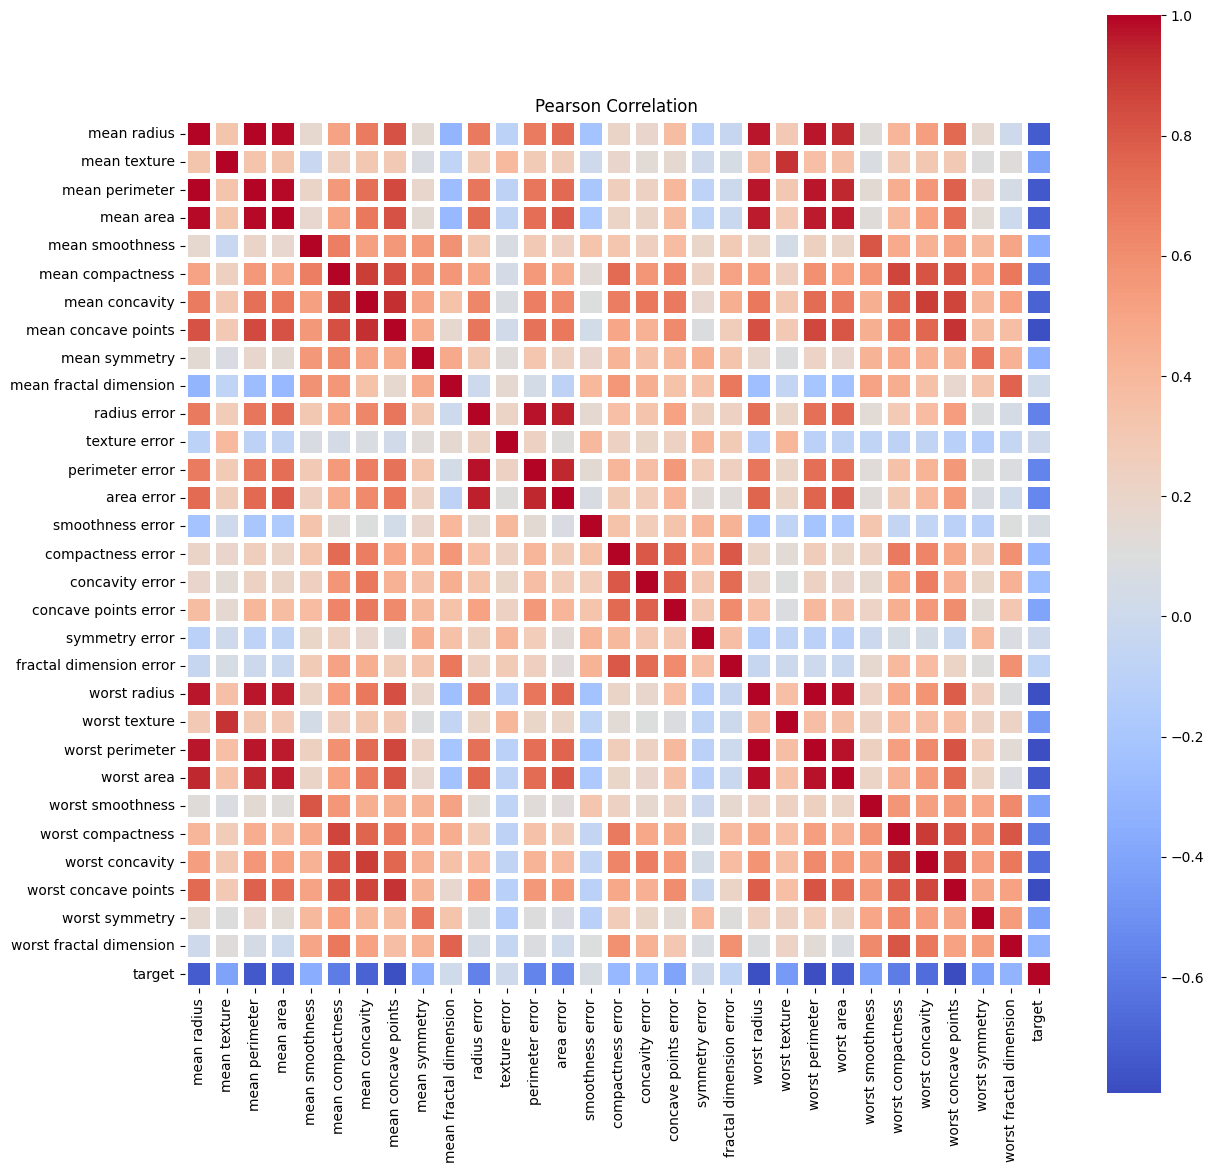

In [ ]:
import matplotlib.pyplot as plt

# we will be using a cool plotting library called seaborn!
import seaborn as sns

plt.figure(figsize=(14,14))

# we will do this using .corr()
correlation = cancer_data.corr(method='pearson') #alternatively, you can use 'spearman'

# take a look at the correlation variable by printing it in another cell and printing it if you'd like

sns.heatmap(correlation,
           xticklabels=correlation.columns.values,
           yticklabels=correlation.columns.values,
           annot = False, # put True if you want it to show the correlation degree on cell
           fmt='0.1g', # if annot=True, how many significant to display
           cmap= 'coolwarm',
           linewidths=3,
           linecolor='white',
           square=True,
           cbar_kws= {'orientation': 'vertical'},
           annot_kws = {'size':8}
           )

plt.title("Pearson Correlation ")

plt.show()

The bright red blocks outside of the diagonal are high positively correlated features while the bright blue blocks are high negatively correlated features. Do any of these correlations seem reasonable to you?

If we know the radius of something, do we have a decent approximation of its area and perimeter?

If we keep the mean radius and worst radius, can get rid of mean perimeter and mean area, and worst perimeter and worst area?

We can use the results of our correlation analysis to drop some features. What are the benefits of doing this?

1. We reduce redundancy by removing features that provide the same information.
2. Removing some features will make interpretation of the results of our model much simpler.
3. For a smaller dataset like WBCD it probably won't matter much, but when you're training on hundreds of thousands of data, reducing the number of features will increase computational efficiency.

In [ ]:
cancer_data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

*Feature engineering*, specifically *feature selection*, is the process of choosing or designing the most important features to use in a machine learning model.

We have to be intentional about what features to train the model with. But, of course, we can't just throw away  features randomly. We must make sure the model's performance won't suffer for it! How are we going to do that?

Let's remind ourselves of our goal here. The task is to predict whether a tumor is malignant or benign. We've done a correlation analysis to see if there are features that we may want to drop. We can also look at the distribution of features for the two types of tumors.

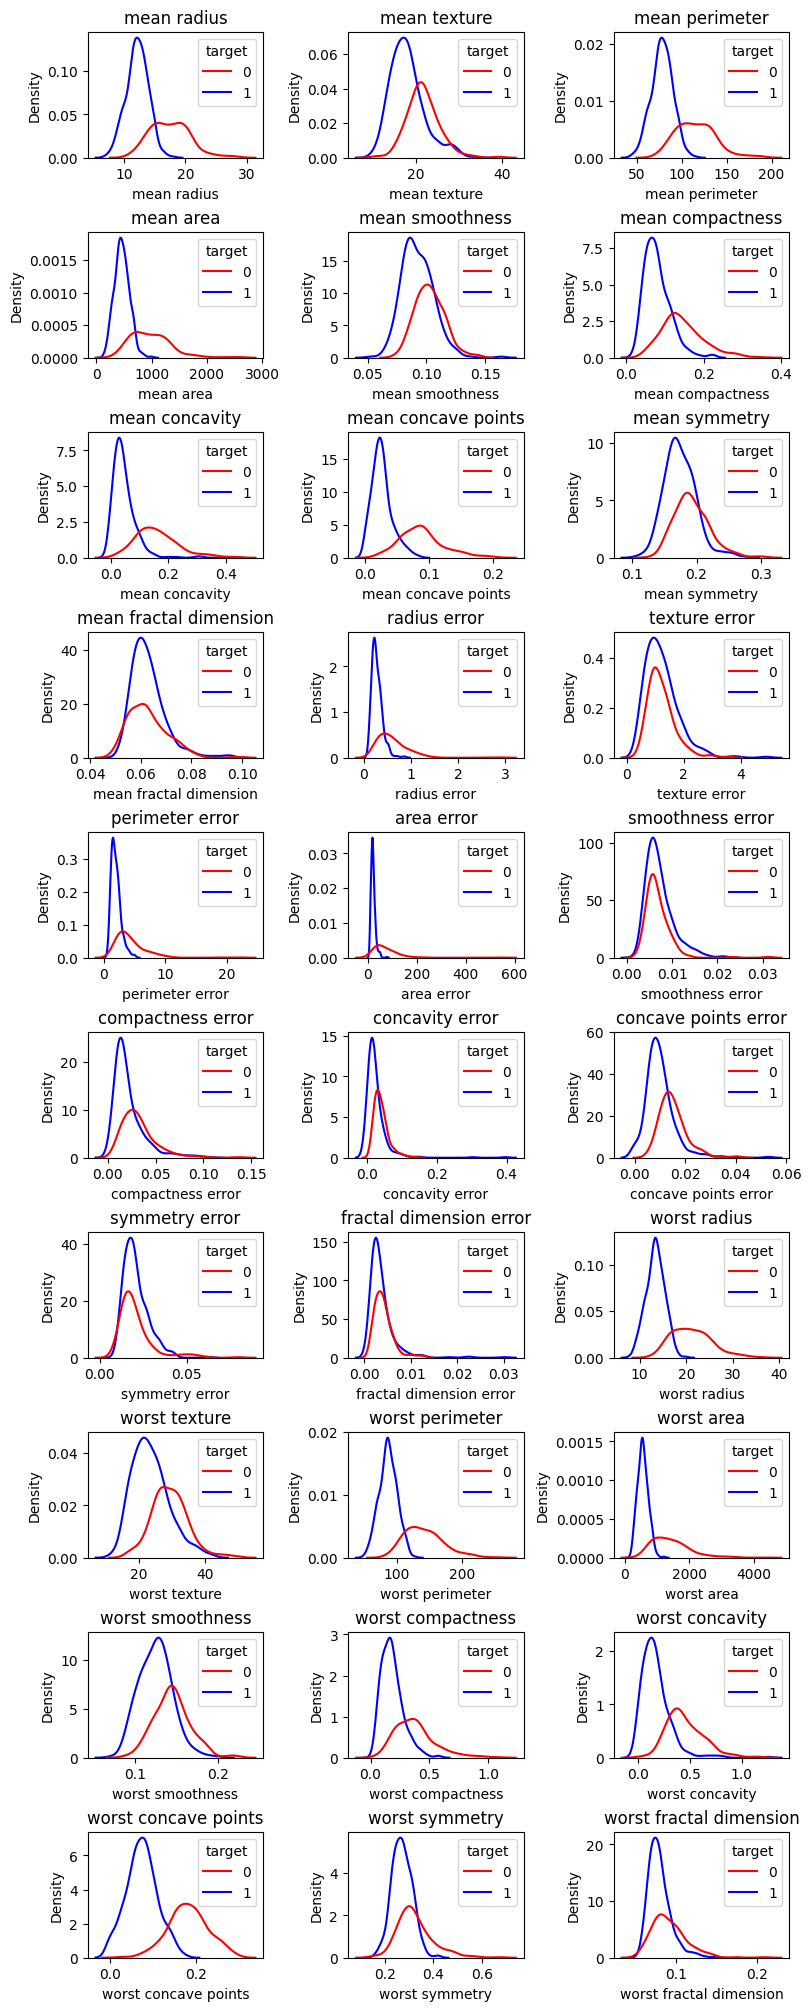

In [62]:
num_features = len(cancer_data.columns)-1 # exclude target column
n_cols = 3  # Number of columns in the grid
n_rows = (num_features+n_cols-1) // n_cols  # Calculate the number of rows

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, n_rows * 2), constrained_layout=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration


# Plot each feature as a histogram
for i, feature in enumerate(cancer_data.columns[:-1]): #exclude target column
    sns.kdeplot(
        data=cancer_data,
        x=feature,
        hue='target',
        ax=axes[i],
        palette={0: 'red', 1: 'blue'},
        legend=True,
    )
    axes[i].set_title(feature)
    axes[i].set_ylabel('Density')

plt.show()

What can you observe? For which features do the distributions of benign and malignant tumor cells look distinct? For example look at "worst concave points" and see how distinct the two distributions are compared to, say, "smoothness error."

In a classification task like this, when the two target classes (in this case, 1 - benign and 0 - malignant) are nicely partitioned, it means that the feature is a good predictor of the target class. Of course, we can't just use the "worst concave points" feature as our only predictor, we have to use it in combination with other strong predictors to ensure that we can get the best accuracy possible.

In [63]:
# Let's keep our best features and remove others
drop_features = ['mean area', 'mean perimeter', 'worst radius', 'worst area', 'worst perimeter', 'worst texture', 'mean concavity', 'perimeter error', 'area error']  # redundant features. keep fundanmanel feature. weigh them?
cancer_data_filtered  = cancer_data.drop(columns=drop_features)
cancer_data_filtered

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,...,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,...,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,...,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,...,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,...,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,...,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.13890,0.1726,0.05623,1.1760,1.2560,0.010300,...,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,0.09780,0.10340,0.09791,0.1752,0.05533,0.7655,2.4630,0.005769,...,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,0.08455,0.10230,0.05302,0.1590,0.05648,0.4564,1.0750,0.005903,...,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,0.11780,0.27700,0.15200,0.2397,0.07016,0.7260,1.5950,0.006522,...,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Now that we've selected our best features to train the model, let's work on actually training it!

##Train and test split

First, let us delineate our inputs and outputs. Generally, inputs are denoted by the variable X and outputs by the variable y.

In [72]:
# From the cancer data, what are columnns that we want to have in our inputs?
# Can we create our input by just dropping the columns that we don't want to keep?
X = cancer_data_filtered.drop(['target'], axis=1)
y = cancer_data_filtered['target']

In [70]:
# TO DO: print the dimensions of X and y
# Let's check that the input and output shapes make sense to us.
# Your code goes here
print(X.shape, y.shape)

(569, 21) (569,)


We will now split our data into train dataset and test dataset. The train dataset will be used to train our models. We will evaluate how well our model is performing on the test dataset. A common split of train and test data is 80:20 i.e. 80% of all the data you have is used to train the model and 20% is used to test the model. That is what we will be doing for the next few examples.

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [74]:
# TODO:
# Print the sizes of X_train, X_test, y_train, y_test. What do you expect to see?
# Your code goes here!
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 21) (114, 21) (455,) (114,)


##Classical Approaches to ML

###Logistic Regression

Logistic regression is a fundamental ML classification method. \\
Here's a brief explanation of what this method does - it computes a linear combination of the different features, let's call this linear combination *l*. It runs this linear combination through a sigmoid function to obtain a probability that the output belongs to **class 1**. \\


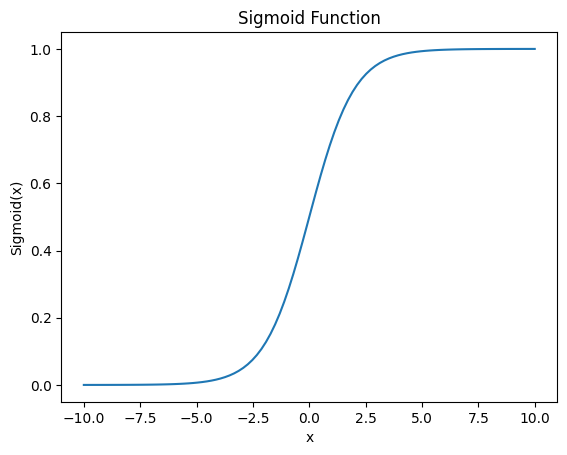

In [75]:
# We will now plot the sigmoid function!
#The sigmoid function is a mathematical function commonly used in machine learning, statistics, and artificial neural networks.
#It maps any real-valued number to a value between 0 and 1, making it particularly useful for tasks like classification and probability estimatio
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
s = sigmoid(x)

plt.plot(x, s)
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.title("Sigmoid Function")
plt.show()

In our case, the output is the probability that a particular datapoint belongs to **class 1**. What will the logistic regression method predict in our formulation?


#### Model Fitting

In [76]:
from sklearn.linear_model import LogisticRegression

# We will now create an instance of a Logistic Regression model and fit it on our training data.
# Parameters are constantly updated as the model is being trained. We stop training our model when the parameters converge.
# We can set the number of maximum iterations that we want our model to go through in order to fit the data.

log_reg_model = LogisticRegression(max_iter=500).fit(X_train, y_train)

Our model has now been fit! We will see how well the model does on the test data. First, let's make predictions on our test data.

In [79]:
print(log_reg_model.predict(X_test))

# But, we said that the output of logistic regression is a probability.
# What is happening? Can we look at the probabilities?

print(log_reg_model.predict_proba(X_test))

# Logistic regression has a threshold of .5.
# If the probability of predicting 1 > 0.5 (the second column in the output), the output is 1
# Otherwise, the output is 0.

[1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1
 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1
 1 1 1]
[[1.69335007e-02 9.83066499e-01]
 [2.12286132e-01 7.87713868e-01]
 [3.59966067e-01 6.40033933e-01]
 [1.74064306e-01 8.25935694e-01]
 [8.81211598e-03 9.91187884e-01]
 [3.71216969e-03 9.96287830e-01]
 [9.99999759e-01 2.40791571e-07]
 [9.96045475e-01 3.95452539e-03]
 [9.90807105e-01 9.19289475e-03]
 [1.39817511e-03 9.98601825e-01]
 [9.92749251e-01 7.25074948e-03]
 [9.99101944e-01 8.98055601e-04]
 [9.94834247e-01 5.16575283e-03]
 [4.88175676e-02 9.51182432e-01]
 [1.18113890e-01 8.81886110e-01]
 [5.52475221e-04 9.99447525e-01]
 [3.81384928e-03 9.96186151e-01]
 [9.85988458e-03 9.90140115e-01]
 [3.74413052e-01 6.25586948e-01]
 [6.23541368e-03 9.93764586e-01]
 [8.13002173e-01 1.86997827e-01]
 [4.62659168e-02 9.53734083e-01]
 [3.67332192e-01 6.32667808e-01]
 [4.9292

####Evaluating Model Performance

The simplest metric to predict model performance is accuracy. Do you remember the definition of accuracy?

In [80]:
log_reg_model.score(X_test, y_test)

0.9824561403508771

Does this look like a good accuracy?

What is the model's performance on the training data?

In [81]:
log_reg_model.score(X_train, y_train)

0.9362637362637363

Not all errors are equal.
If a patient has a benign tumor and we predict it as malignant, is that more harmful than if a patient has a malignant tumor which we predict as benign?

True positive, false positive, true negative and false negative capture the different ways a model is right or wrong. A confusion matrix displays these effectively.

An easy way to remember definitions:
The positive or negative refer to model predictions of whether something has a positive class label or a negative class label. True or false refers to the truth/target values.

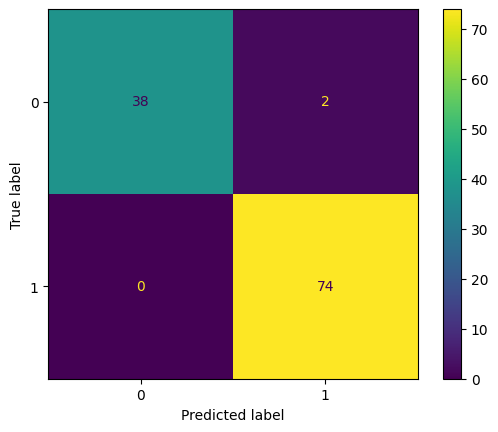

In [84]:
y_pred = log_reg_model.predict(X_test)
log_reg_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)  #confusion_matrix(y_test, y_pred) (True labels first, then predicted labels).
#log_reg_confusion_matrix = sklearn.metrics.confusion_matrix(y_pred, y_test)
log_reg_cm_display = sklearn.metrics.ConfusionMatrixDisplay(log_reg_confusion_matrix)
log_reg_cm_display.plot()

#### Recap

The structure of building a ML model using sklearn is as follows.
* Create an instance of a model
* Fit the model on your training data
* Evaluate your model on the test data appropriately

You can combine the creation of a model class instance and the fitting in your code.

### Decision Trees

 Decision trees are a particularly popular classification method because they are interpretable. Essentially, you can think of a decision tree as someone asking you a set of questions based on the input features and then telling you whether your input is from the '0' class or the '1' class. We will visualize decision trees and that will make all of this clearer! Decision trees can be used both for classification and regression. Since we're using sklearn for decision trees, the code you see will be very similar to the code for logistic regression (and this makes coding basic models in sklearn very convenient!)

In [92]:
# Importing the DecisionTreeClassifier class, creating an instance and fitting training data
from sklearn.tree import DecisionTreeClassifier
dec_tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)  # more max depth, more accuracy. max_depth is hypoparameter

[Text(0.5, 0.8333333333333334, 'x[4] <= 0.049\ngini = 0.47\nsamples = 455\nvalue = [172, 283]'),
 Text(0.25, 0.5, 'x[0] <= 14.98\ngini = 0.109\nsamples = 277\nvalue = [16, 261]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.052\nsamples = 260\nvalue = [7, 253]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.498\nsamples = 17\nvalue = [9, 8]'),
 Text(0.75, 0.5, 'x[17] <= 0.224\ngini = 0.217\nsamples = 178\nvalue = [156, 22]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.115\nsamples = 164\nvalue = [154, 10]')]

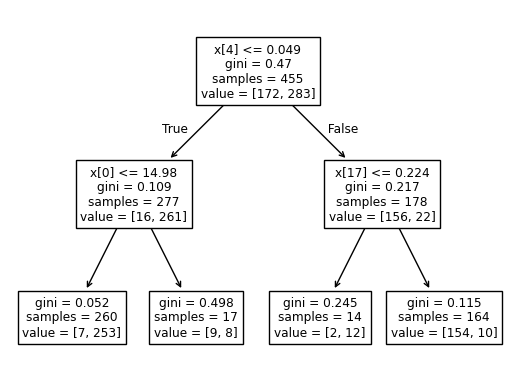

In [93]:
# Visualizing the decision tree model
from sklearn import tree
tree.plot_tree(dec_tree_model)

In [95]:
# Computing the accuracy of the decision tree model on our test set
dec_tree_model.score(X_test, y_test)

0.9385964912280702

What does max depth correspond to? What happens if we change the max depth?

1 0.9035087719298246
2 0.9385964912280702
3 0.9385964912280702
4 0.9298245614035088
5 0.9473684210526315
6 0.9122807017543859
max_depth=1, test_score=0.9035087719298246
max_depth=2, test_score=0.9385964912280702
max_depth=3, test_score=0.9385964912280702
max_depth=4, test_score=0.9385964912280702
max_depth=5, test_score=0.9385964912280702
max_depth=6, test_score=0.9210526315789473


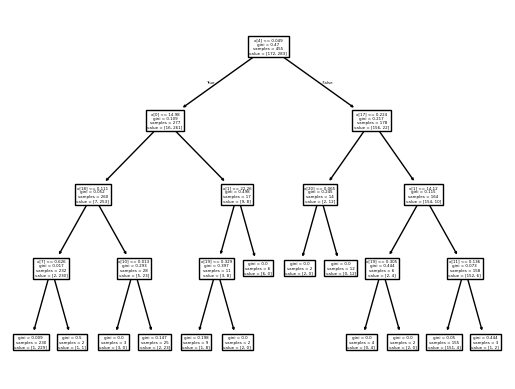

In [113]:
# TO DO
# Can you create a decision tree with max_depth 1 and fit it on the training data
# Your code goes here
from sklearn.tree import DecisionTreeClassifier
dec_tree_model_2 = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)  # more max depth, more accuracy, but not always. over training.


# Can you evaluate the performance of the model on the test set and visualize the tree
# Your code goes here
from sklearn import tree
tree.plot_tree(dec_tree_model_2)
dec_tree_model_2.score(X_test, y_test)


gg = [1,2,3,4,5,6]
score = []
for i in gg:
    dec_tree_model_2 = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    dec_tree_model_2.score(X_test, y_test)
    score = dec_tree_model_2.score(X_test, y_test)
    print(i, score)

#################

from sklearn.tree import DecisionTreeClassifier

# Example max_depth values
gg = [1, 2, 3, 4, 5, 6]

# List to store test scores
scores = []

for i in gg:
    # Train the Decision Tree model with different max_depth values
    dec_tree_model_2 = DecisionTreeClassifier(max_depth=i)
    dec_tree_model_2.fit(X_train, y_train)

    # Compute and store the test score
    score = dec_tree_model_2.score(X_test, y_test)
    scores.append((i, score))  # Store depth and score as a tuple

# Print scores for each max_depth
for depth, score in scores:
    print(f"max_depth={depth}, test_score={score}")

0.9035087719298246

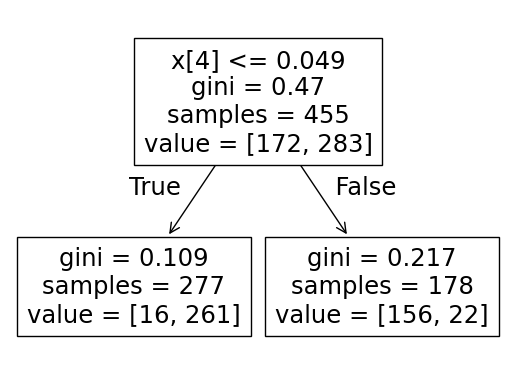

In [96]:
# TO DO
# Can you create a decision tree with max_depth 1 and fit it on the training data
# Your code goes here
from sklearn.tree import DecisionTreeClassifier
dec_tree_model_1 = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)  # more max depth, more accuracy


# Can you evaluate the performance of the model on the test set and visualize the tree
# Your code goes here
from sklearn import tree
tree.plot_tree(dec_tree_model_1)
dec_tree_model_1.score(X_test, y_test)








**Hyperparameter:** The max depth in our case is an example of a hyperparameter. It's something that the user sets or makes a decision about. It's not a parameter that the algorithm learns. Hyperparameter tuning is an integral part of machine learning and we will only be taking a look at it very briefly!

### **Exercise 1: Random Forests**
Can you now look at the [documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for random forests (which are collections of decision trees) and train a random forest for the task at hand? \\
a) How well does a random forest perform in comparison to a decision tree of the same depth? \\
b) What is the parameter 'n_estimators' used to control? Is that a hyperparameter?


In [114]:
# TO DO
# Your code goes here

# Import RandomForestClasssifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
# Create a RandomForestClassifier with max_depth 2
rf_model = RandomForestClassifier(max_depth=2, random_state=42)

# Fit the RandomForestClassifier that you defined on your training data
rf_model.fit(X_train, y_train)
# Score the RandomForestClassifier on your test data!
rf_model.score(X_test, y_test)
##########################################################
from sklearn.ensemble import RandomForestClassifier

# Example max_depth values
gg = [1, 2, 3, 4, 5, 6]

# List to store test scores
scores = []

for i in gg:
    # Train the Random Forest model with different max_depth values
    rf_model = RandomForestClassifier(max_depth=i, random_state=42)
    rf_model.fit(X_train, y_train)

    # Compute and store the test score
    score = rf_model.score(X_test, y_test)
    scores.append((i, score))  # Store depth and score as a tuple

# Print scores for each max_depth
for depth, score in scores:
    print(f"max_depth={depth}, test_score={score}")  # overfitting: high train score and low test score

max_depth=1, test_score=0.9210526315789473
max_depth=2, test_score=0.9298245614035088
max_depth=3, test_score=0.9385964912280702
max_depth=4, test_score=0.956140350877193
max_depth=5, test_score=0.956140350877193
max_depth=6, test_score=0.956140350877193


max_depth=1, estimators=50, test_score=0.9298245614035088
max_depth=1, estimators=100, test_score=0.9210526315789473
max_depth=1, estimators=150, test_score=0.9298245614035088
max_depth=2, estimators=50, test_score=0.9298245614035088
max_depth=2, estimators=100, test_score=0.9298245614035088
max_depth=2, estimators=150, test_score=0.9298245614035088
max_depth=3, estimators=50, test_score=0.9298245614035088
max_depth=3, estimators=100, test_score=0.9385964912280702
max_depth=3, estimators=150, test_score=0.9385964912280702
max_depth=4, estimators=50, test_score=0.9473684210526315
max_depth=4, estimators=100, test_score=0.956140350877193
max_depth=4, estimators=150, test_score=0.956140350877193
max_depth=5, estimators=50, test_score=0.9473684210526315
max_depth=5, estimators=100, test_score=0.956140350877193
max_depth=5, estimators=150, test_score=0.956140350877193
max_depth=6, estimators=50, test_score=0.956140350877193
max_depth=6, estimators=100, test_score=0.956140350877193
max_depth

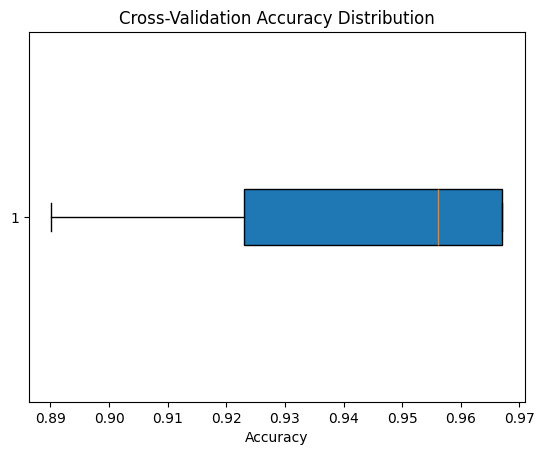

In [126]:
# TO DO
# Your code goes here
#    max_depth controls the complexity of each tree (local decision-making).
#    n_estimators controls the number of trees in the forest (global robustness).
#Use cross-validation to tune both parameters for the best balance between performance and computational efficiency. Let me know if you need more details!
#Trade-offs

 #   Fewer Trees (n_estimators) + Deeper Trees (max_depth):
  #      Can overfit the data as individual trees become too complex.

   # More Trees (n_estimators) + Shallower Trees (max_depth):
    #    Balances bias and variance, leading to better generalization.

# Can you create a RandomForestClassifier with a different max_depth and
# a value for n_estimators that is different from the default value?
gg = [1, 2, 3, 4, 5, 6]
nn = [50, 100, 150]
# List to store test scores
scores = []

for i in gg:
    for j in nn:
    # Train the Random Forest model with different max_depth values
        rf_model = RandomForestClassifier(max_depth=i, n_estimators = j, random_state=42)   #The n_estimators parameter in RandomForestClassifier specifies the number of trees in the forest.
        rf_model.fit(X_train, y_train)

    # Compute and store the test score
        score = rf_model.score(X_test, y_test)
        scores.append((i,j, score))  # Store depth, estimator and score as a tuple. Adds the tuple (i, j, score) to the scores list.

# Print scores for each max_depth
for depth, estimator, score in scores:
    print(f"max_depth={depth}, estimators={estimator}, test_score={score}")
# Train it and see how it does on your test set




#Next Steps

    #Cross-Validation:
     #   Use cross-validation (cross_val_score) to validate the robustness of the best model.
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the best model with the selected hyperparameters
best_rf_model = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.4f}")
import matplotlib.pyplot as plt

plt.boxplot(cv_scores, vert=False, patch_artist=True)
plt.title("Cross-Validation Accuracy Distribution")
plt.xlabel("Accuracy")
plt.show()
    #Fine-Tuning:
     #   Perform finer hyperparameter tuning around the best combination (e.g., between max_depth=2 and 3 or n_estimators=100 and 150).

    #Test on Unseen Data:
     #   After selecting the best model, evaluate it on an independent test set for final validation.

##Modern Approaches to ML

### Neural Networks

Neural networks are an incredibly powerful method to capture complex patterns in data and make predictions. You can look up the universal approximation theorem to understand what makes neural networks so powerful. Today, we will look at a simple neural network and how to train it.

Here's a schematic of a simple neural network

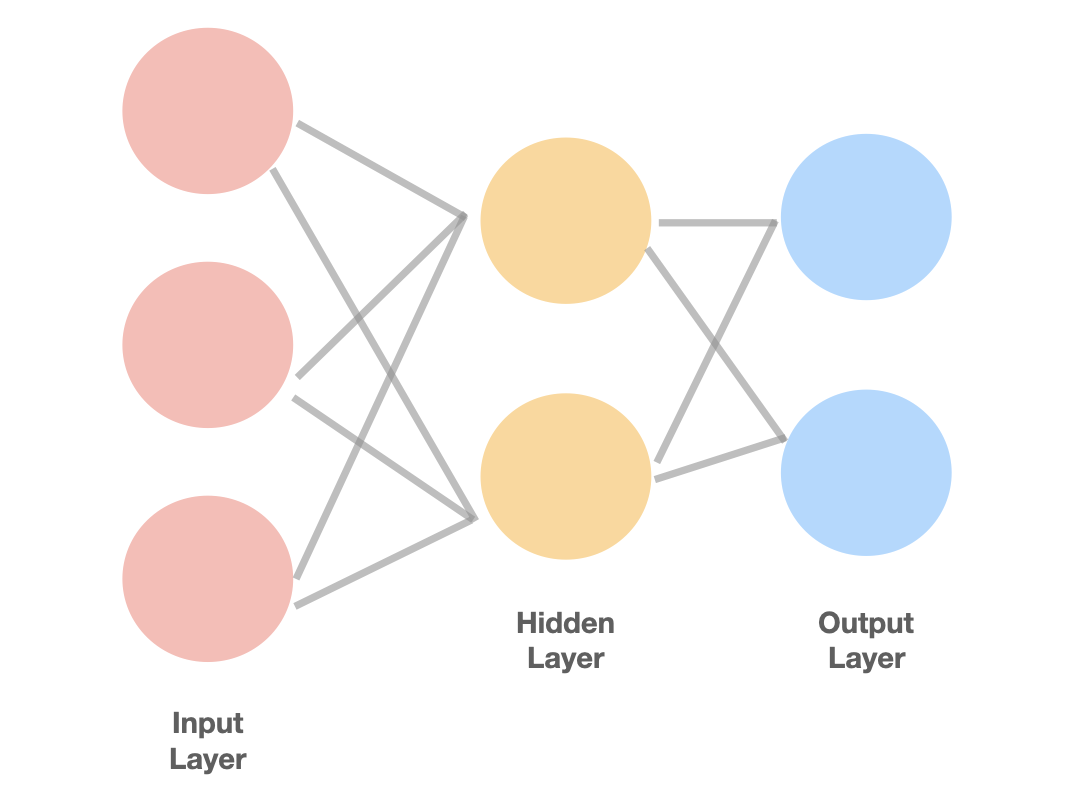

We have an input layer with 3 nodes corresponding to 3 features. In our case, we'd have 21 nodes in our input layer.

There is a hidden layer with 2 nodes and an output layer with 2 nodes. In our example, we might have an output layer with 2 nodes corresponding to the probabilities that a particular tumor is benign and that it is malignant. It could also be a single value that corresponds to the probability that the tumor is benign (or) a single value that corresponds to the probability that the tumor is malignant.

#### Creating a neural network

We will now try coding a simple neural network using sklearn again! \\
What we will experiment with, is the number of hidden layers and the number of nodes in each layer. \\
MLPClassifier can take an input hidden_layer_sizes. We can fill it in with as many values as we'd like hidden layers. The values that we fill in will be the number of nodes in each hidden layer.

In [129]:
from sklearn.neural_network import MLPClassifier
# Let's now create a neural network with 2 hidden layers.
# The first hidden layer will have 10 nodes and the second will have 5.
# We will train it on the training set and evaluate it on the test set
nn_10_5 = MLPClassifier(alpha=1e-05, max_iter=1000, hidden_layer_sizes=(10, 5), random_state=1) # two hidden layers and 5 nodes
nn_10_5.fit(X_train, y_train)
nn_10_5_score = nn_10_5.score(X_test, y_test)
print(nn_10_5_score)

0.9824561403508771


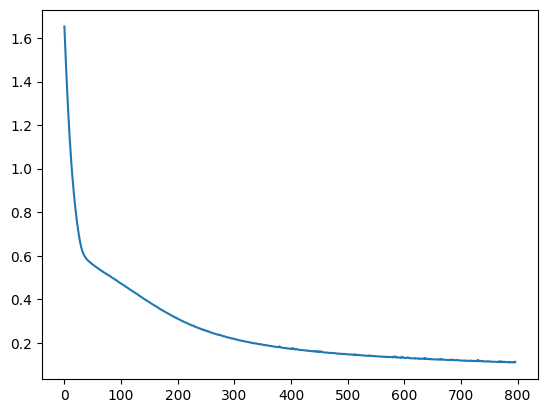

In [130]:
# Plotting the training and validation loss (loss curve)
plt.plot(nn_10_5.loss_curve_)
# Does this make sense?

0.6491228070175439


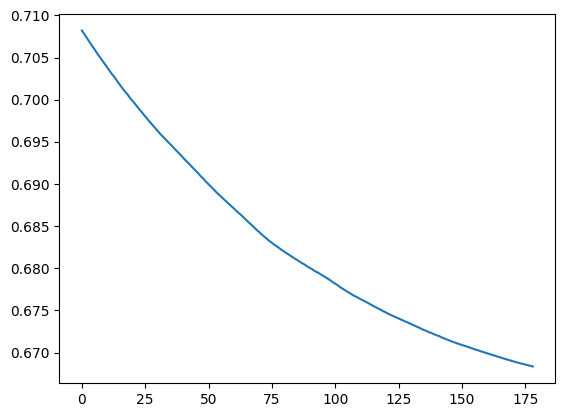

In [135]:
# TO DO
# Can you try creating a neural network with 1 hidden layer?
nn_10 = MLPClassifier(alpha=1e-05, max_iter=1000, hidden_layer_sizes=(10), random_state=1)
# Set the hidden layer to have 4 nodes
nn_4 = MLPClassifier(alpha=1e-05, max_iter=1000, hidden_layer_sizes=(4), random_state=1)
# How does the accuracy of this neural network compare to the accuracy of the previous one?
# Your code goes here
nn_4.fit(X_train, y_train)
nn_4_score = nn_4.score(X_test, y_test)
print(nn_4_score)
plt.plot(nn_4.loss_curve_)
#result the exmaple is more complex, it has more layer



#hidden_layer_sizes=(10, 5)
#The hidden layer processes the input data by applying weights, biases, and an activation function to produce meaningful intermediate representations.
#It captures complex patterns and relationships in the data that are not apparent in the raw input.

# hidden layer refers to any layer of neurons that sits between the input layer (where the raw data enters) and the output layer (where predictions or classifications are made).
# Hidden layers are where most of the learning and transformation of data happens in a neural network.
#For a network defined with hidden_layer_sizes=(10, 5):
   # Input Layer:
    #    Number of neurons = Number of features in the input data.
     #   Takes raw data as input.

    #First Hidden Layer:
     #   10 neurons.
        #Each neuron is connected to all input layer neurons.

    #Second Hidden Layer:
      #  5 neurons.
      #  Each neuron is connected to all neurons in the first hidden layer.

   # Output Layer:
     #   Number of neurons = Number of target classes (for classification) or 1 (for regression).

#### Learning Curves, Overfitting, Underfitting


So far, we've taken our data, split it into train and test. We've trained our model on the training data and evaluated it on the test data. Now, we will split our data into train, validate and test. We will train our model on the train data, pick hyperparameters according to model performance on validation data, and eventually, get a sense of the model's performance on the test data!

We will first plot learning curves for a neural network with 3 layers in total, and with 8 nodes in the hidden layer to understand overfitting and underfitting. We will then move on to hyperparameter tuning.

In [137]:
# Let's take our data, X and y. Let's split the data into train_val and test.
# Let 20% of your data be in the test set and let the other 80% go into train_val.

# We will create X_train_val, X_test, y_train_val, y_test using the train_test_split function that you already imported!
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [145]:
# Let us now split X_train_val, y_train_val into X_train, X_val, y_train and y_val
# We will have 30% of X_train_val in X_val and the remaining in X_train.

# TO DO
# Create X_train, X_val, y_train, y_val
# Your code goes here
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


In [146]:
X_train.shape
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(341, 21) (114, 21) (341,) (114,)


In [151]:
# Computing train and validation losses for a neural network with 1 hidden layer with 8 nodes
# This model is trained for 4000 epochs

from sklearn.metrics import log_loss

nn = MLPClassifier(alpha=1e-05, max_iter=1, hidden_layer_sizes=(8,), random_state=1)   #Neural Network Setup:
val_loss_array = []
train_loss_array = []
for epoch in range(4000):
  # Train the neural network on the train set
  nn.partial_fit(X_train, y_train, np.unique(y_train))    #Partial Training:Trains the model incrementally on one epoch of data. Unlike fit, it does not reinitialize the weights, which makes it useful for custom training loops

  # Evaluate the neural network on the validation set
  train_loss_array.append(nn.loss_)                         #Loss Computation: 1, Training Loss, nn.loss_ (Measures how well the model fits the training data. A consistently decreasing training loss indicates that the model is learning from the data.)
                                                            #2, Validation Loss: log_loss. tell how the close to the true value. Measures how well the model generalizes to unseen validation data.  If the validation loss starts increasing while training loss decreases, it’s a sign of overfitting.


                                                            #Epochs, The model is trained for 4000 epochs, updating weights in each iteration and tracking the loss.
  y_val_pred_proba = nn.predict_proba(X_val)
  val_loss = log_loss(y_val, y_val_pred_proba)
  val_loss_array.append(val_loss)

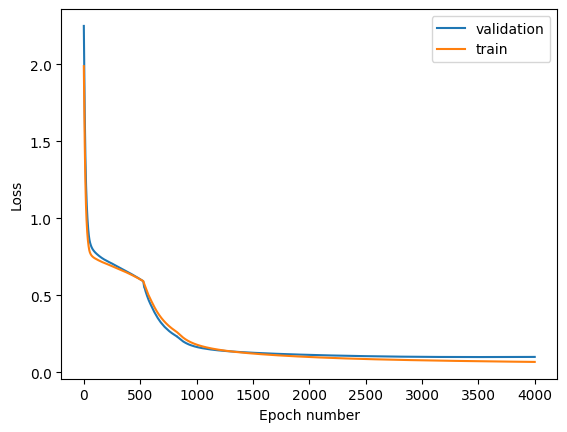

In [150]:
# Plot the validation and training scores
plt.plot(val_loss_array, label = 'validation')
plt.plot(train_loss_array, label = 'train')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

It is important to plot training and validation losses to see when you should stop training. We run the risk of overfitting if we train models beyond a point. We will see the validation loss increase while the training loss reduces. You can look at this [link](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/) to learn more about overfitting, underfitting etc.

#### Hyperparameter Tuning

Hyperparameter tuning is crucial to training models to optimize performance. Let's take a look at tuning the number of nodes in the hidden layer of a neural network with 3 layers in total

In [163]:
# We will now do some hyperparameter tuning!
# Let's create a neural network with 1 hidden layer.
# We will decide what the size of the hidden layer should be from a set of options - 4, 8, 16
scores = []
for i in [4, 8, 16]:
  # Create a neural network
    nn = MLPClassifier(alpha=1e-05, max_iter=2000, hidden_layer_sizes=(i,), random_state=1)

  # Train the neural network on the train set
    nn.fit(X_train, y_train)

  # Evaluate the neural network on the validation set
    val_score = nn.score(X_val, y_val)

  # Print the validation score
  #print(f'Validation score for {i} nodes: {val_score}')

    scores.append((i, val_score))
for depth, score in scores:
      print(f'Validation score for {depth} nodes: {score}')

Validation score for 4 nodes: 0.6754385964912281
Validation score for 8 nodes: 0.9473684210526315
Validation score for 16 nodes: 0.956140350877193


In [161]:
scores = []
for i in [4, 8, 16]:
    # Create a neural network
    nn = MLPClassifier(alpha=1e-05, max_iter=2000, hidden_layer_sizes=(i,), random_state=1)

    # Train the neural network on the train set
    nn.fit(X_train, y_train)

    # Evaluate the neural network on the validation set
    val_score = nn.score(X_val, y_val)

    # Append the number of nodes and the validation score as a tuple
    scores.append((i, val_score))

# Print all results
for depth, score in scores:
    print(f'Validation score for {depth} nodes: {score}')

#converge meaning:


Validation score for 4 nodes: 0.6754385964912281
Validation score for 8 nodes: 0.9473684210526315
Validation score for 16 nodes: 0.956140350877193


In [168]:
# TO DO
# Pick the number of nodes 'n' in the hidden layer based on validation error
# Let us now see how well a neural network with 'n' nodes in the hidden layer does on the test set.

# First, let's set up our neural network and train it on the train set
# Your code goes here
nn_8 = MLPClassifier(alpha=1e-05, max_iter=2000, hidden_layer_sizes=(8,), random_state=1)
nn_8.fit(X_train, y_train)

# Now, let us evaluate it on the test set
# Your code goes here
test_score = nn_8.score(X_test, y_test)

test_score


for i in [4, 8, 16]:
    nn_i = MLPClassifier(alpha=1e-05, max_iter=2000, hidden_layer_sizes=(i,), random_state=1)
    nn_i.fit(X_train, y_train)
    test_score = nn_i.score(X_test, y_test)
    print(f'Test score for {i} nodes: {test_score}')

Test score for 4 nodes: 0.631578947368421
Test score for 8 nodes: 0.9736842105263158
Test score for 16 nodes: 0.9736842105263158


#### k-fold cross-validation

Can you think of any problems that arise with how we did things using a single split of train-validation-test set? \\
The test error is dependent on how we partitioned our data into train and validation. If we want a more robust estimate of how well our models perform, we would do k-fold cross validation.


Here's how k-fold cross-validation is performed.
* We split our data into training and test sets.
* We take our training data and split it into k-folds of roughly equal size.
* We train on k-1 folds and validate our model on the remaining fold, repeating this procedure iteratively. In each iteration, one of the k-folds will act as the validation set with the other k-1 being used to train the model.
* At the end of the procedure, we average the validation scores from the k runs to choose our model and/or report a validation score.

The figure below will illustrate this!

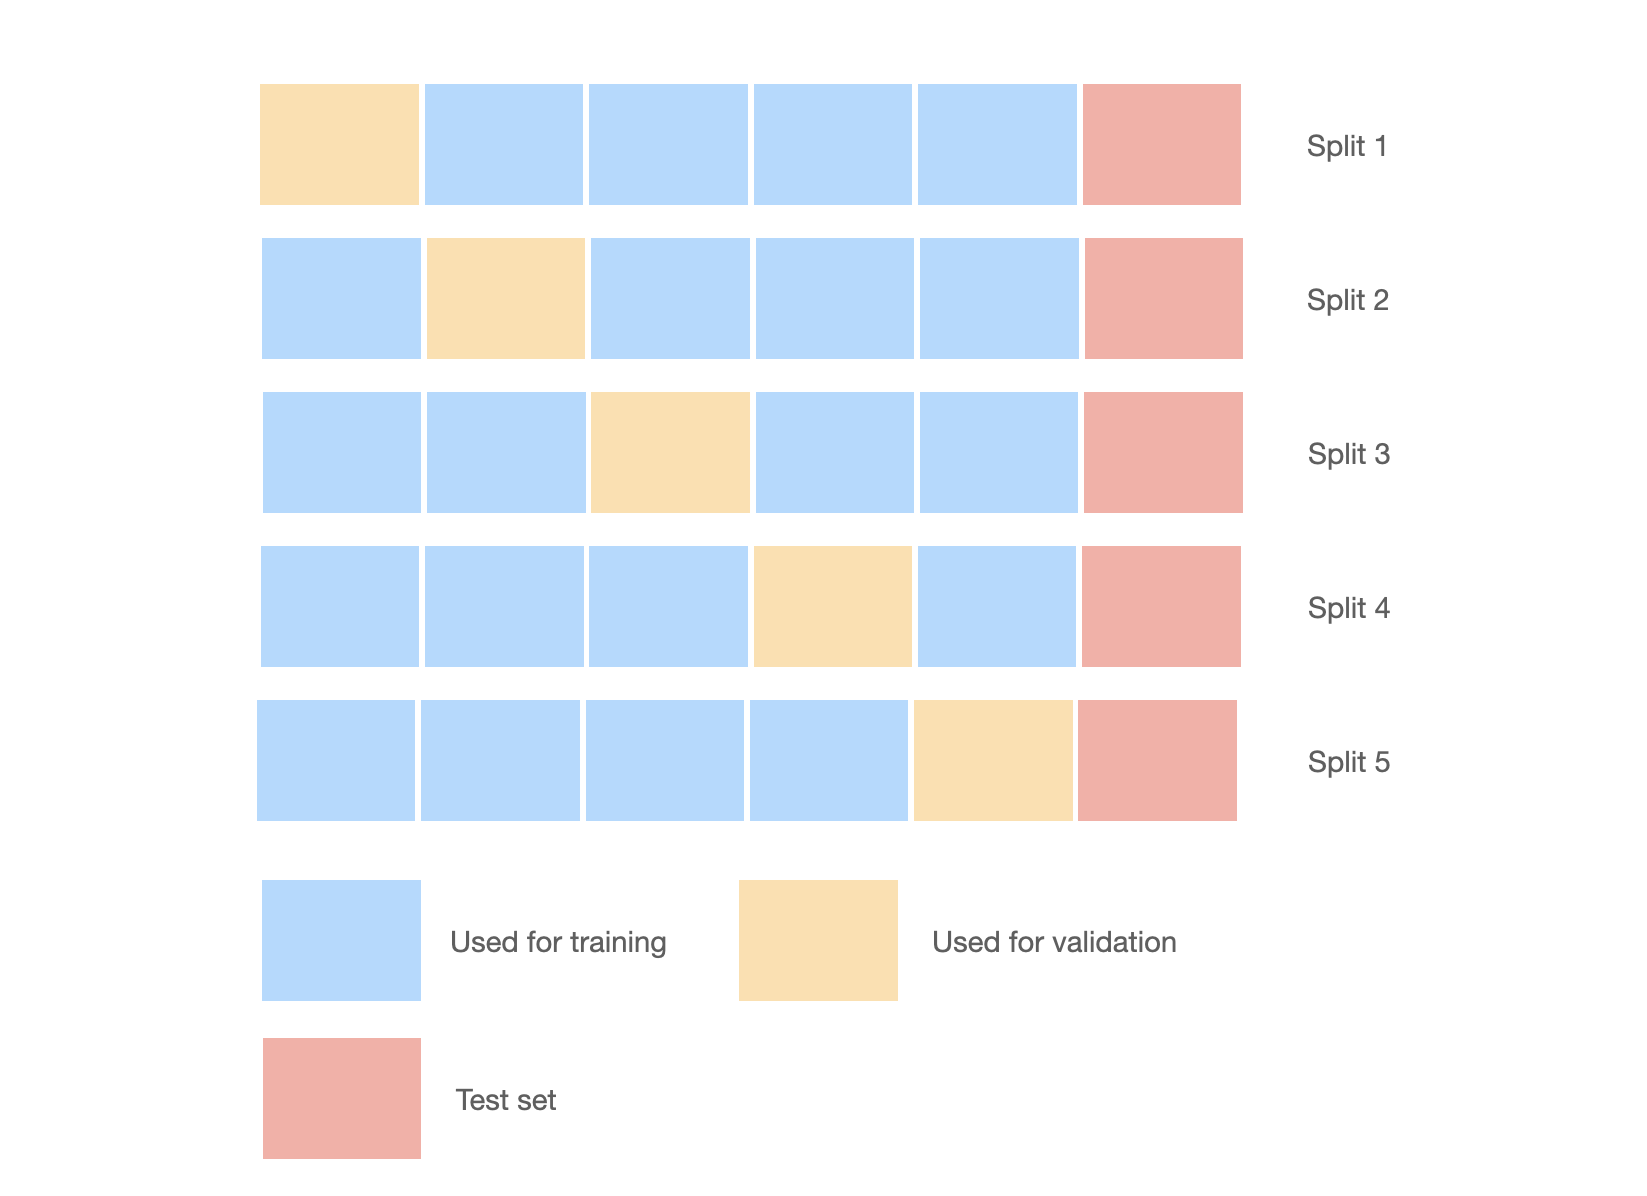

In [169]:
# We will now use k-fold crossvalidation with k = 5 to get an estimate of how well our model is doing
# For this example, let us create a neural network with 4 nodes in the hidden layer
from sklearn.model_selection import cross_val_score
nn = MLPClassifier(hidden_layer_sizes = (4, ), max_iter = 5000)
scores = cross_val_score(nn, X_train_val, y_train_val, cv=5)

In [170]:
# scores is a list with the 5 validation scores
print(scores)
# We will now print the mean and standard deviation of the scores
print(scores.mean(), scores.std())

[0.91208791 0.92307692 0.62637363 0.93406593 0.95604396]
0.8703296703296705 0.12284121857127141


In [174]:
# Let's evaluate the performance of the neural network on the test set again
nn.fit(X_train_val, y_train_val)
print(nn.score(X_test, y_test))
print(nn.score(X_val, y_val))
#print(nn.score(X_train_val, y_train_val))

0.9736842105263158
0.9736842105263158
0.9538461538461539


# Take home: Multiclass Classification Model
Let's now try training a multiclass classification model. In multiclass classification, our outputs belong to >2 classes.

In [180]:
from sklearn import datasets

# Load the digits dataset
digits = datasets.load_digits()

# Looking at the sizes of the datasets
# Each datapoint is an 8*8 pixel image and the output is a single value corresponding to the digit
print(digits.data.shape)
print(digits.target.shape)
digits.data

(1797, 64)
(1797,)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [176]:
# Printing the unique target values
print(np.unique(digits.target))
# Does this seem alright to you?

# What is the range of pixel values we have?
print(np.min(digits.data), np.max(digits.data))

[0 1 2 3 4 5 6 7 8 9]
0.0 16.0


In [182]:
digits.images[100]

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

4


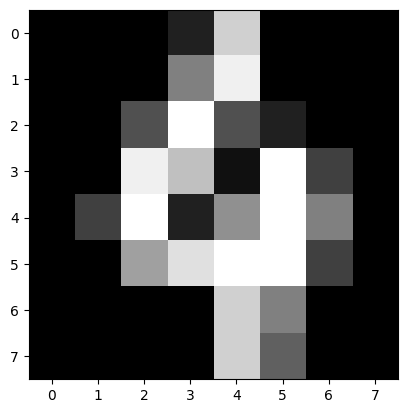

In [181]:
# We will now visualize one of these datapoints
import matplotlib.pyplot as plt
plt.imshow(digits.images[100], cmap = 'gray')
print(digits.target[100])

In [183]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=41)

In [185]:
# TODO:

# Create a LogisticRegression model and set max_iter to 2000
digits_model = LogisticRegression(max_iter = 2000)

# Fit the model on the train dataset
digits_model.fit(X_digits_train, y_digits_train)


# Fit the model on the train dataset

# Evaluate the model on the test dataset
print(digits_model.score(X_digits_test, y_digits_test))

0.9611111111111111


In [186]:
from sklearn.metrics import multilabel_confusion_matrix
# Confusion matrix
con_mat = multilabel_confusion_matrix(y_digits_test, digits_model.predict(X_digits_test))
print(con_mat)

[[[322   0]
  [  1  37]]

 [[323   4]
  [  1  32]]

 [[321   1]
  [  0  38]]

 [[323   1]
  [  4  32]]

 [[321   0]
  [  0  39]]

 [[319   2]
  [  0  39]]

 [[324   0]
  [  1  35]]

 [[327   0]
  [  1  32]]

 [[327   5]
  [  4  24]]

 [[319   1]
  [  2  38]]]


What do you think the con_mat contains? You can look up the documentation [here](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html)

In [ ]:
1, data type and structure and which regression
2, split the data without cheating
3, image to use the neural network
4, look at the data
5, fig out loss

#Take home: How to run Python locally on your computer

While Google Colab/Python notebooks are awesome, there are plenty of other ways to run python! We suggest downloading a local installation.




## Installing Python with Anaconda

A very straighforward way to do this is by installing the a free Python distribution via [Anaconda](https://www.anaconda.com/download). With Anaconda, your python installation should come with plenty of popular libraries including those that we've used all week (i.e. pandas, numpy, etc.)! Note that if space is an issue, you can dowload [Miniconda](https://docs.anaconda.com/miniconda/) instead. It won't come with all the libraries Anaconda has, but you can install packages that you need manually. I'll go over it at the end of this section.

To install Anaconda or Miniconda, click on the Anaconda link.

1. Enter your email (optional, there is a small button to skip registration).

2. Pick your operating system (Windows, Mac, Linux)

3. In your Downloads folder, click on the file you just downloaded and an installer should pop out! This is what mine looks like on a Mac.

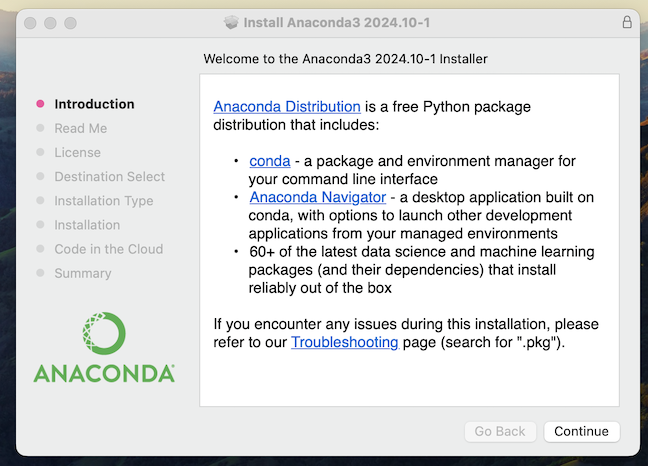

  4. Click continue until it finishes installing. This should take care of everything for you :)

  Congrats, your computer should now have Python running!

  To confirm, open your Terminal (Command Line for Windows) and type:

```
python --version
```



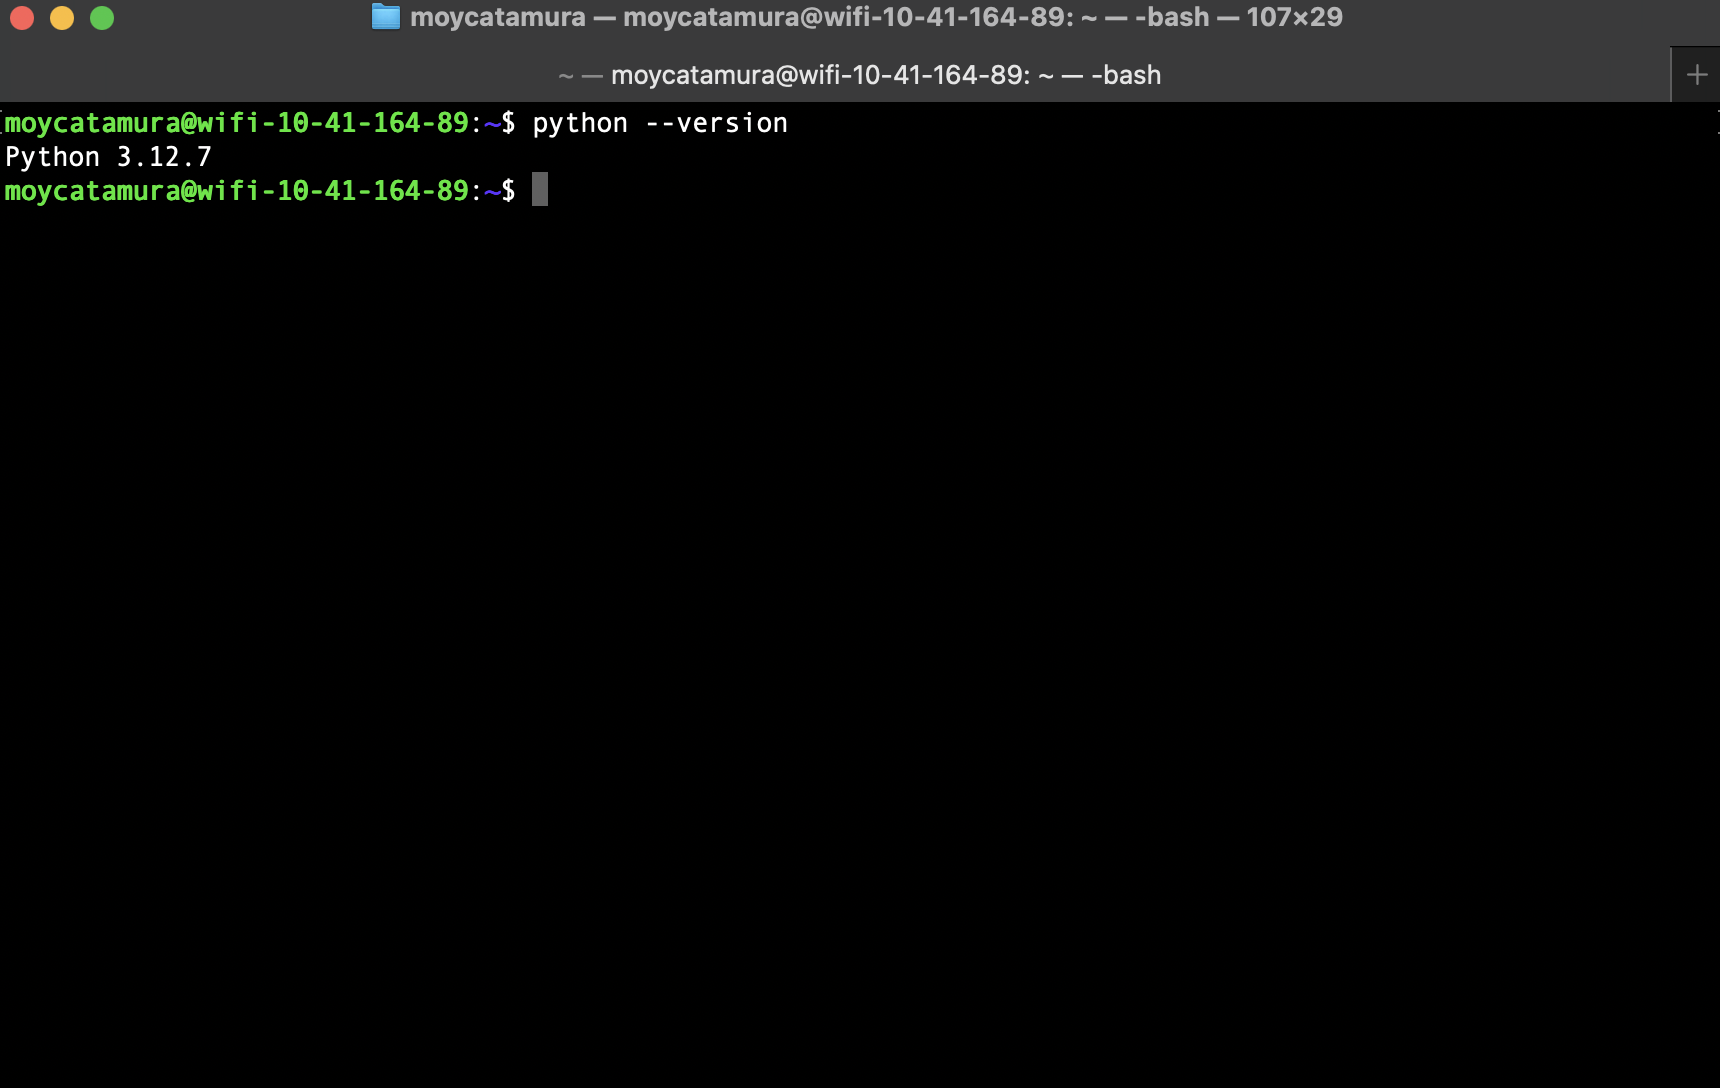

## The many ways of programming in Python

### Interactive shell

Using your Terminal/Command Line, you can can run lines of python codes using an interactive shell. I wouldn't recommend doing it this way because it makes it hard to debug code and there's no way to save your work. The interactive shell should be used for quick tasks/checks, not for script writing!


On your Terminal/Command Line, type:


```
python
```



On the interactive python shell, you should be able to run any python code.

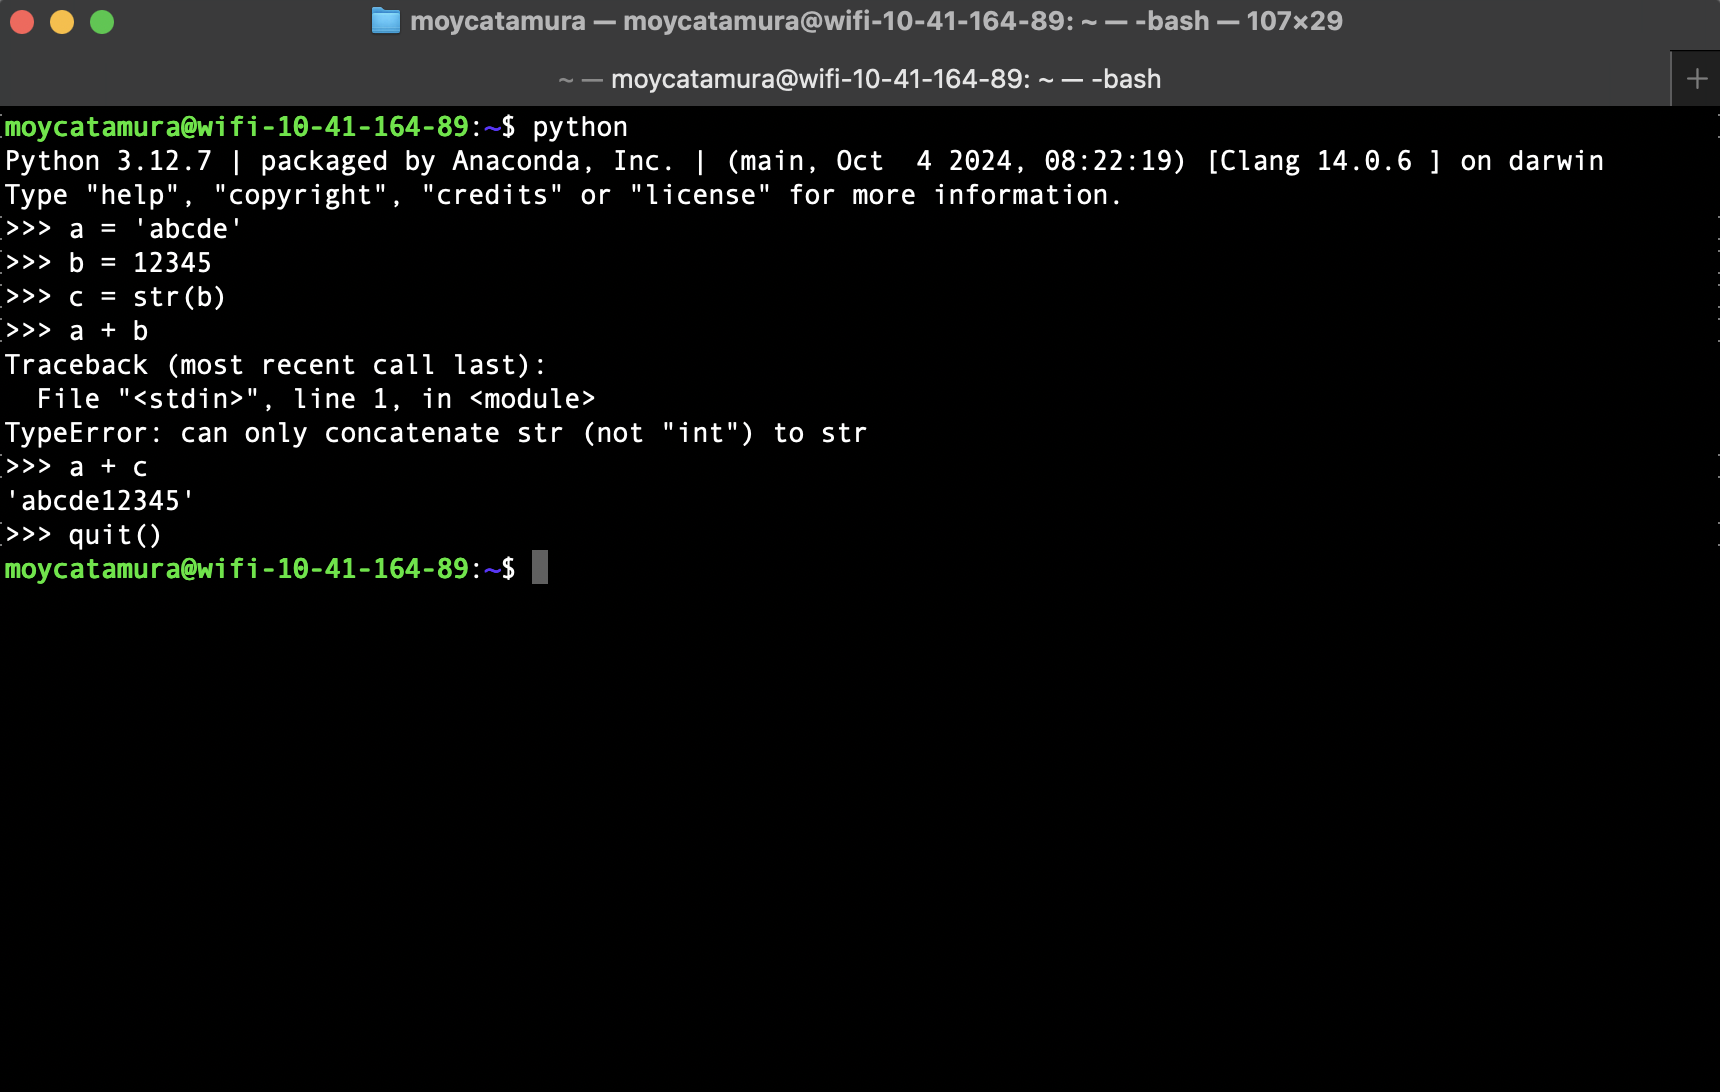

To quit the interactive shell, type

```
quit()
```



###Using an IDE

For beginners, this is what we recommend! If you downloaded Anaconda, your install should come with an IDE called Spyder (see here how to launch [Spyder](https://docs.anaconda.com/working-with-conda/ide-tutorials/spyder/) after installing Anaconda). [PyCharm](https://www.jetbrains.com/pycharm/) is another popular python IDE. [Pycharm should be free if you apply using you university email.](https://www.jetbrains.com/community/education/#students)

An Integrated Development Environment (IDE) provides tools to write, debug, and run Python programs. (If you use R, RStudio is an IDE!)

Here's what PyCharm looks like:



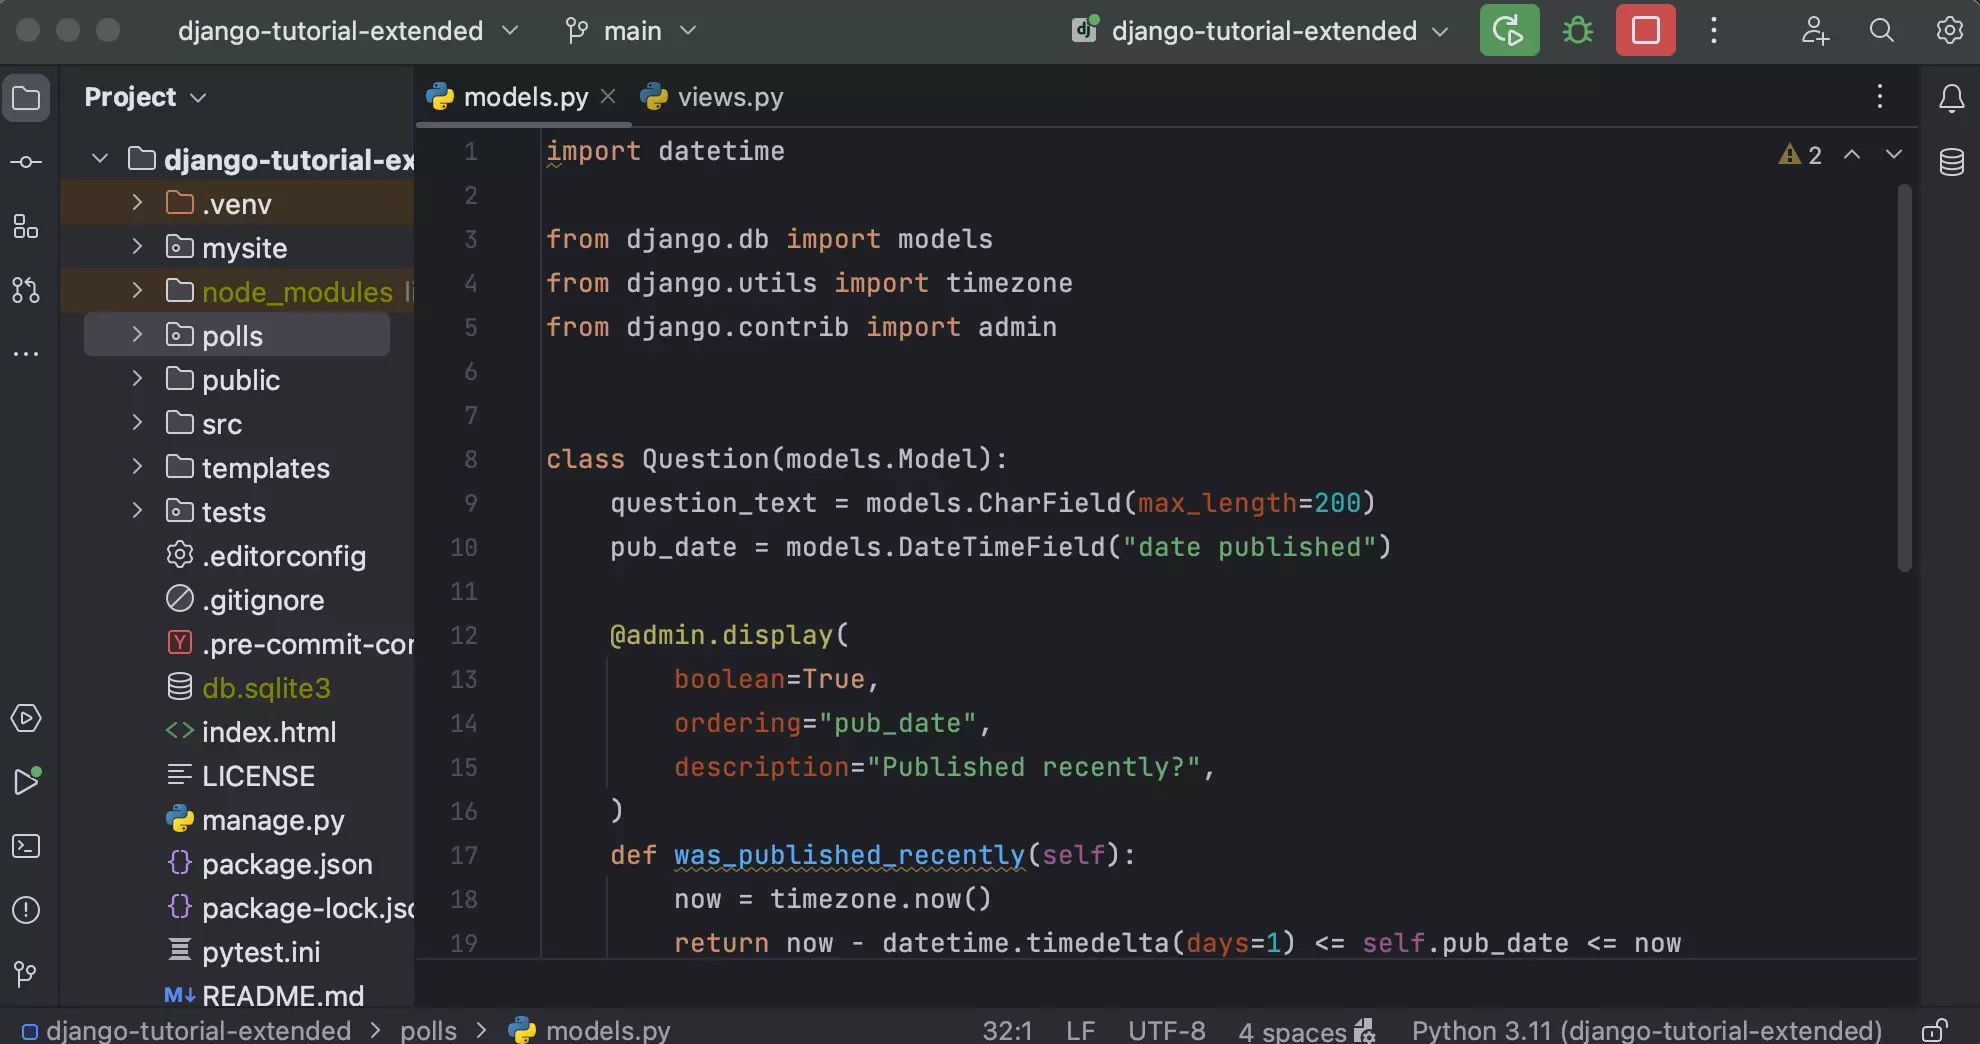

[Here's an super helpful tutorial on how to start using Pycharm.](https://www.youtube.com/watch?v=HHcZbXsZtm0). At 4:00 in the video, you can see how to run your Python code in PyCharm. It's a little different than Jupyter in that all the code in you script runs all at once instead of in blocks of code cells.

### How to install libraries with Anaconda

Here's how to install additional Python libraries via Anaconda.

First, you guessed it, open your terminal! Next, type your command


```
conda install library_name
```

For example if I was installing a library called seaborn, I would type

```
conda install seaborn
```

It should tell you in the end if the installation was successful or not and it might ask you to upgrade any other libraries that it's dependent on.

#Take home: Additional ML resources for you, we wish you a happy ML journey :)

## Free ML courses

1. [Machine Learning by Andrew Ng Coursera](https://www.coursera.org/learn/machine-learning) - **I highly recommend this one!**

2. [Google's Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course)

3. NVIDIA offers one free technical course through their [developer program](https://developer.nvidia.com/join-nvidia-developer-program?ncid=pa-srch-goog-733296-Developer-Brand-Broad&_bt=719473581963&_bk=nvidia%20courses&_bm=b&_bn=g&_bg=167029173582&gad_source=1&gclid=CjwKCAiAp4O8BhAkEiwAqv2UqKDcdb1x94QvwKnlw3B1A2XAri1Ib5AApAXTWlXGeQBwrtARHm7YsRoCE-QQAvD_BwE) :)

4. [Introduction to Machine Learning from MIT OCW](https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/about)

5. [Fundamentals of TinyML by Harvard University](https://pll.harvard.edu/course/fundamentals-tinyml)

6. Not a course but a quick [tutorial for Tensorflow](https://www.tensorflow.org/tutorials/quickstart/beginner)


## ML Practice

7. There's lots of fun ML problems to solve on [Kaggle](https://www.kaggle.com/).

## Books + Blogs

8. I have this book: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 3rd Edition ISBN: 9781098125974

9. [A visual introductions to Machine Learning](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) - **Definitely check this out, it's super cool!**

10. [Machine Learning Mastery](https://machinelearningmastery.com/start-here/)

11. Every single question about Python to exist has been asked in [stackoverflow](https://stackoverflow.com/) at some point. I've debugged many of my programming problems reading through stackoverflow questions.



